C:\Users\bhara_\AppData\Local\Temp\ipykernel_12648\633998658.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
C:\Users\bhara_\AppData\Local\Temp\ipykernel_12648\633998658.py:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["education"] = data["education"].replace({"Graduate": 1, "Not Graduate": 0})
C:\Users\bhara_\AppData\Local\Temp\ipykernel_12648\633998658.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dat

Model Accuracy: 97.65%
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       561
           1       0.96      0.99      0.98       502

    accuracy                           0.98      1063
   macro avg       0.98      0.98      0.98      1063
weighted avg       0.98      0.98      0.98      1063

Confusion Matrix:
 [[543  18]
 [  7 495]]


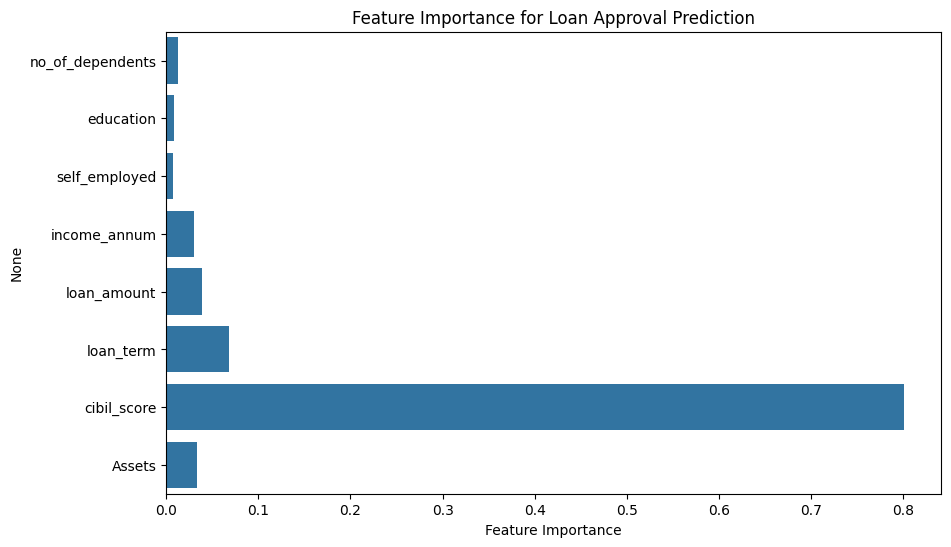

Model and Scaler saved successfully!
Loan Rejected.
Probability of Approval: 7.00%


c:\Users\bhara_\OneDrive\Desktop\approval\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [63]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load dataset
data = pd.read_csv("loan_approval_dataset.csv")

# Drop unnecessary columns
data.drop(columns=["loan_id"], inplace=True, errors='ignore')
data.columns = data.columns.str.strip()

# Feature Engineering
data["Assets"] = (data["residential_assets_value"] + data["commercial_assets_value"] +
                   data["luxury_assets_value"] + data["bank_asset_value"])
data.drop(columns=["residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"], inplace=True)

# Clean column names and values
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Encode categorical variables
data["education"] = data["education"].replace({"Graduate": 1, "Not Graduate": 0})
data["self_employed"] = data["self_employed"].replace({"No": 0, "Yes": 1})
data["loan_status"] = data["loan_status"].replace({"Approved": 1, "Rejected": 0})

# Handle missing values
data.fillna(data.select_dtypes(include=[np.number]).median(), inplace=True)

# Split features and target
X = data.drop(columns=["loan_status"])
y = data["loan_status"]

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
threshold = 0.5  # Adjust threshold for approval
y_pred = (y_prob > threshold).astype(int)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Loan Approval Prediction")
plt.show()

# Save Model & Scaler
with open("loan_approval_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

with open("loan_scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and Scaler saved successfully!")

# Make Predictions
# Define input features for a loan applicant
no_of_dependents = 0
education = 1  # 1 for Graduate, 0 for Not Graduate
self_employed = 0  # 1 for Yes, 0 for No
income_annum = 500  # Applicant's annual income
loan_amount = 1500000000  # Loan amount
loan_term = 360  # Loan term in months
cibil_score = 0  # CIBIL score
Married = 1  # 1 for Married, 0 for Not Married
Assets = 1000  # Total value of assets

# Create input data array
input_data = np.array([[no_of_dependents, education, self_employed, income_annum, loan_amount, loan_term, cibil_score, Assets]])

# Load the saved model and scaler
with open("loan_approval_model.pkl", "rb") as model_file:
    model = pickle.load(model_file)

with open("loan_scaler.pkl", "rb") as scaler_file:
    scaler = pickle.load(scaler_file)

# Preprocess input data
input_data_scaled = scaler.transform(input_data)

# Make prediction
prediction = model.predict(input_data_scaled)
prediction_prob = model.predict_proba(input_data_scaled)[:, 1]

# Display results
if prediction[0] == 1:
    print("Loan Approved!")
else:
    print("Loan Rejected.")

print(f"Probability of Approval: {prediction_prob[0] * 100:.2f}%")


C:\Users\bhara_\AppData\Local\Temp\ipykernel_12648\3057800208.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["loan_status"], palette="viridis")


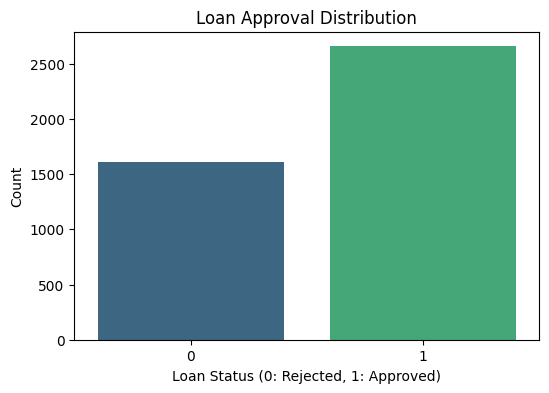

In [64]:
plt.figure(figsize=(6, 4))
sns.countplot(x=data["loan_status"], palette="viridis")
plt.title("Loan Approval Distribution")
plt.xlabel("Loan Status (0: Rejected, 1: Approved)")
plt.ylabel("Count")
plt.show()

In [65]:
import seaborn as sns

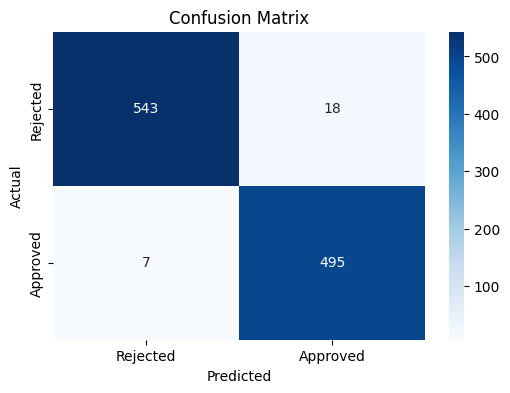

In [66]:

# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()